# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Read the worksheet carefully before doing the exercises.

# Introduction

In this worksheet we’ll look at the extraction of information from experimental data. This is important for PX2338 (Obs tech) and your work in the year 2 lab as well as your year 3/4 project.

We’ll first examine fitting of data with a straight line and then move on to more complicated functions.

## Fitting with a straight line

Let’s see how to fit data with a straight line, taking advantage of functions. **Go back to week 2 - Functions** and make sure you understand it. In particular, from week2 exercise 3 you fitted a straight line to data. Your code should look something like the code below. You will already have defined a function called linfit, which works along these lines:

slope:  99.0595238095238 +/- 0.9295121405070327
intercept:  6.166666666666632 +/- 3.8884282607017973



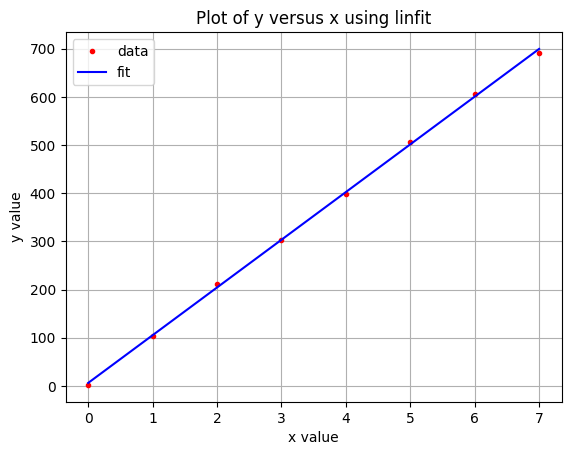

In [9]:
# put some test data into arrays ...
x_data = np.array([ 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0 ])
y_data = np.array([ 2, 104, 212, 302, 398, 507, 606, 692 ])

# define a nice, self-contained fitting routine.
def linfit(x, y):
    '''
    Takes input arrays x an y and performs a linear least squares fit.
    Returns estimated slope, error is slope,
    intercept, error in intercept.
    '''
    # do LSF using method described in PX1224 week 4 ...
    p_coeff, residuals, _, _, _ = np.polyfit(x, y, 1, full=True)
    # Note: residuals is returned as an array with one element.
    # residuals[0] is the value of this element
    n = len(x)
    D = sum(x**2) - 1./n * sum(x)**2
    x_bar = np.mean(x)
    dm_squared = 1./(n-2)*residuals[0]/D
    dc_squared = 1./(n-2)*(D/n + x_bar**2)*residuals[0]/D
    dm = np.sqrt(dm_squared)
    dc = np.sqrt(dc_squared)
    return p_coeff[0], dm, p_coeff[1], dc

# Calling the fitting function:
m, dm, c, dc = linfit(x_data, y_data)
print ('slope: ', m, '+/-', dm)
print ('intercept: ', c, '+/-', dc)
print ()

# Now for plotting purposes, we define a linear function
def linear(x, m, c):
    return m*x + c

# alternative method to define the linear function
# (effectively, it's identical to the other method
# *p means just a list of values)
def linear(x, *p):
    return p[0]*x + p[1]

# plot data
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
x_plot = np.linspace(min(x_data),max(x_data),num=100)
plt.plot(x_plot, linear(x_plot, m, c), 'b-',label='fit')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using linfit')
plt.legend()
plt.grid ()

The above thus implements a linear least squares fit using polyfit. **Make sure that your linfit routine works ok**. You can use this whenever you have data in the year 2 lab that you need to fit to a straight line.

## Fitting with a more general function
You can of course easily extend this and fit polynomials using `polyfit`, but what about more complicated functions? We’ll take advantage of the `scipy.optimize` routine `curve_fit` to fit directly just about any function we wish.
The general way the curve fitting function is used is like this

```python
popt, pcov = curve_fit(f=func, xdata=x, ydata=y, p0=init_guess, bounds=([a_min, b_min], [a_max, b_max]))
```

Here, `func` is just the name of a function that you have defined, `x` and `y` are equal length data arrays, `init_guess` is an array of initial values (somewhere near to the final values you expect). (They don’t have to be called func, x, y and init_guess since those names are up to you in your program. But the `f=` parts and so on must be written as above.) The term `bounds` is to constrain the range of the parameters fitted and can usually be left out.

There are other keywords which you can explore in Jupyter notebook’s help (Cmd/Ctrl+Space, Option+Esc or Tab for autocomplete, Cmd/Ctrl+Shift+Space for Docstring, depending on your settings and shortcuts. Cmd for Macs, Ctrl for Windows). Or go to this [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

Actually, the above form can be simplified slightly to

```python
# recommended form to use
popt, pcov = curve_fit(func, x, y, init_guess, bounds=([a_min, b_min], [a_max, b_max]))
```

and you may not need the `bounds` key word.

An example to show the usage is below. Here, we define a quadratic function as an illustration and check we get sensible result.

In [3]:
def quadratic(x, *p):
    return p[0]*x**2 + p[1]*x + p[2]

Do not run `curve_fit()` right away ! First make sure your fitting function makes sense. This is best done by plotting it with some guess parameters against the data:

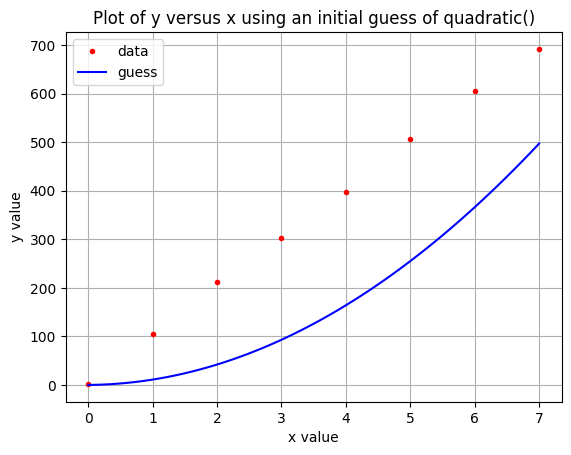

In [4]:
x_plot = np.linspace(min(x_data),max(x_data),num=100)

# compute a guess curve by creating an array y_guess of data points.
p_guess = np.array([10.0, 1.0, 0.0]) # initial guess
y_guess = quadratic(x_plot, *p_guess) # values come from an educated guess looking at the data.

# plot data
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
plt.plot(x_plot, y_guess, 'b-',label='guess')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using an initial guess of quadratic()')
plt.legend()
plt.grid ()

In [5]:
# now do curve fit. We can use the initial guess from before
# we must pass the #name# of the function ...
popt, pcov = curve_fit(quadratic, x_data, y_data, p_guess) # do fit

A few things to note:
We pass to the `curve_fit` routine the _name_ of the function we are fitting, which in this example is the `quadratic` function defined earlier.
The `x_data` and `y_data` arrays are passed in, as well as an initial guess of the variables (which is not that crucial in this case, **but can be critical in some cases**).
The optimised values are returned in the array `popt`, and information on the goodness of fit is returned in the array `pcov`.
Thus the error in `popt[0]` can be found as `sqrt(pcov.diagonal()[0])` and likewise for the other optimised values.
Once the fit is done, you can use the results - printing out the fitted coefficients and the errors for example, or plotting the data and the fitted curve.

a:  -0.5297619047618962 +/- 0.4506310572133935
b:  102.76785714285708 +/- 3.280644647901002
c:  2.4583333333333925 +/- 4.9158055523617366



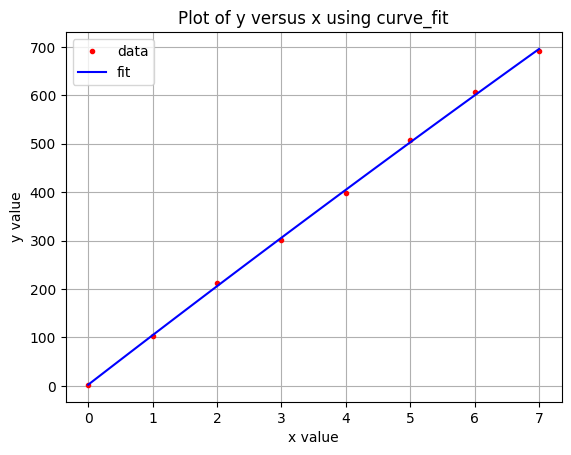

In [6]:
print ('a: ', popt[0], '+/-', np.sqrt(pcov.diagonal()[0]))
print ('b: ', popt[1], '+/-', np.sqrt(pcov.diagonal()[1]))
print ('c: ', popt[2], '+/-', np.sqrt(pcov.diagonal()[2]))
print ()

x_plot = np.linspace(min(x_data),max(x_data),num=100)

# find fitted curve by creating an array yfit of data points ...
yfit = quadratic(x_plot, *popt)

# plot data
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
plt.plot(x_plot, yfit, 'b-',label='fit')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using curve_fit')
plt.legend()
plt.grid ()

Note: the method we’ve used to pass the calculated coefficients to the linear function for plotting `quadratic(x, *popt)` is an alternative to `quadratic(x, popt[0], popt[1], popt[2])` with the same result, but this new notation saves a lot of typing if we have a function of many parameters.

Note2: if there are not many data points it is better (as done in week 2) to set up a new more appropriate array of x values (here called `x_plot`) so that you get a nice smooth curve.

Do the values found for the coefficients make sense to you? What about the errors compared to the errors when using the simpler linear fit?

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets.
**Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

**Note**: "fitting" does include providing the error measurements. E.g. the answer is not $a=100$ but $a=100^+_-1$.

## Exercise 0

[0] See the video on LearningCentral about fitting a Power Law to the Black Holes mass distribution.

## Exercise 1
[2] Use the above ideas to repeat a _linear_ fit using the `curve_fit` routine (not a _quadratic_ as in the example in the introduction). Confirm, by using your linfit function, that you get the same result as before.

Results from curve_fit:
slope:  99.05952368212634 +/- 0.9295118753807752
intercept:  6.166667315765822 +/- 3.8884274741097027

Results from linfit:
slope:  99.0595238095238 +/- 0.9295121405070327
intercept:  6.166666666666632 +/- 3.8884282607017973


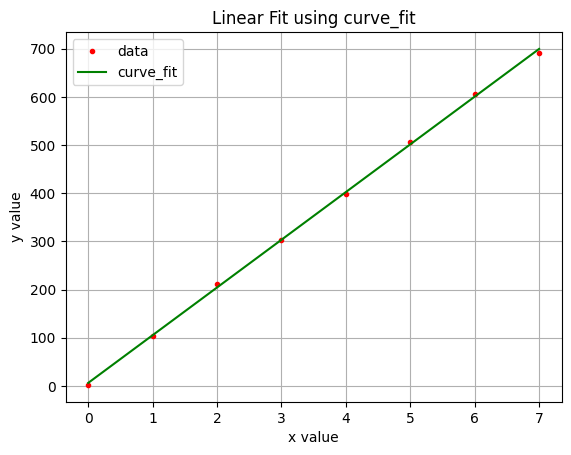

In [10]:
# Define the linear function to be used with curve_fit
def linear_curve_fit(x, m, c):
    return m*x + c

# Use curve_fit to perform the linear fit
# We use an initial guess of [0, 0] for slope and intercept
popt_curve, pcov_curve = curve_fit(linear_curve_fit, x_data, y_data, p0=[0, 0])

# Extract the fitted parameters and their errors
m_curve = popt_curve[0]
dm_curve = np.sqrt(pcov_curve.diagonal()[0])
c_curve = popt_curve[1]
dc_curve = np.sqrt(pcov_curve.diagonal()[1])

# Print the results from curve_fit
print ('Results from curve_fit:')
print ('slope: ', m_curve, '+/-', dm_curve)
print ('intercept: ', c_curve, '+/-', dc_curve)
print ()

# Print the results from linfit for comparison
print ('Results from linfit:')
print ('slope: ', m, '+/-', dm)
print ('intercept: ', c, '+/-', dc)

# Plot the data and the fitted line from curve_fit
x_plot = np.linspace(min(x_data),max(x_data),num=100)
yfit_curve = linear_curve_fit(x_plot, *popt_curve)

plt.plot(x_data, y_data, 'r.',label='data')
plt.plot(x_plot, yfit_curve, 'g-',label='curve_fit')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Linear Fit using curve_fit')
plt.legend()
plt.grid ()
plt.show()

## Exercise 2
The data file `XRD_data_Mo_anode.csv`:

In [7]:
! wget -q https://raw.githubusercontent.com/PX2134/data/master/week4/XRD_data_Mo_anode.csv

contains X-ray diffraction data from a molybdenum anode source, obtained using a NaCl crystal. It shows two features, the K-alpha and K-beta (in the data one can see 3 orders – the 4th is present but weak) on top of a Brehmstrahlung (braking radiation) background. The columns are angle in degrees and intensity (measured as counts per second).

1) [3] Read in the raw data points and plot a graph. Estimate **by eye** and make a note of the rough positions, widths and intensitys of the **first** two **main** peaks in first order (highest peaks), around angles of 6 and 7 degrees. Create a single data array that include the angle and count values from around those two peaks. For instance, to only have the data between angle of 1 and 30 you could do:

    ```python
    angles_selected=angles_full_data[(angles_full_datat>=1) & (angles_full_data<=30)]
    counts_selected=counts_full_data[(angles_full_datat>=1) & (angles_full_data<=30)]
    ```
    
    (1 and 30 are not the right values, you need to look at the plot, and make surer you include all of both peaks, but minimise any other features such as higher order peaks or drop-offs).

2) [2] The peaks can be approximated as Gaussian in shape, i.e.: $$G(x;I,\mu,\sigma)=I\frac{1}{\sigma\sqrt{2\pi}}\exp \left(-\frac{(x-\mu)^2}{2\sigma^2} \right)$$ Define (in a similar way you did for the linear fitting) a Gaussian function, which you will use for fitting the data:

    ```python
    Gau(x, intensity, mu, sigma)
    ```

    Note that this Gaussian is normalised to have an area under the curve of intensity (I).

3) [2] Now use `curve_fit()` to try fitting a Gaussian to the highest peak in the data you selected containing those first two peaks near 6 and 7. and plot the result. Remember to first plot your guess !

4) [3] Repeat, but allowing for a constant background offset to improve the fit. Hint: Do this by defining a fitting function comprising a constant term plus a Gaussian, say `Gau_background(x, intensity, mu, sigma, bckg)`. (You can call the `Gau()` function from within `Gau_background()`. You now have four fitting parameters instead of three.)  
  
5) [4] Repeat, but allowing for a linear background to improve the fit. (This requires a function with an extra fitting parameter.)

6) [4] Repeat, but allowing not only for a linear background to improve the fit, but also trying to fit the other peak together with the main one.

Notes:

  - Always plot your fitting function with some guesses first.
  - If the error on all the parameters is very large, in general it means `curve_fit()` did not really manage to fit anything, don't use those values.
  - Remember parameters are (by default) unbounded floats, e.g. if you try to fit a Gaussian at ~6.8, `curve_fit()` will hapilly try a negative intensity, e.g. fit a dip instead of a peak.
  - When using bounds, careful with railing ! If the errors or values are equal (or nearly equal) to the bounds, the fit is not reliable and depends on the provided bounds.
  - When fitting both signal and background, you can also try subtracting the background fit to the data.


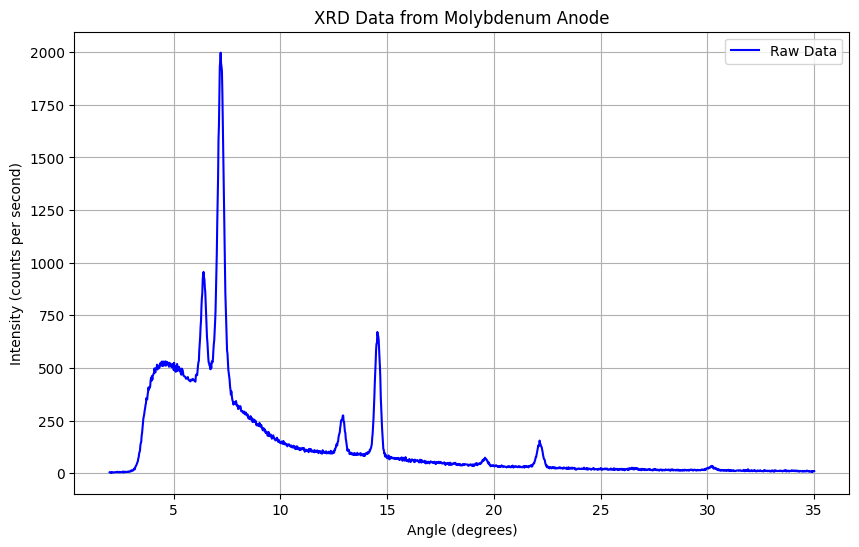

Selected Angles: [6.5  6.52 6.54 6.56 6.58 6.6  6.62 6.64 6.66 6.68 6.7  6.72 6.74 6.76
 6.78 6.8  6.82 6.84 6.86 6.88 6.9  6.92 6.94 6.96 6.98 7.   7.02 7.04
 7.06 7.08 7.1  7.12 7.14 7.16 7.18 7.2  7.22 7.24 7.26 7.28 7.3 ]
41
41
Selected Counts: [ 808.6  765.4  713.6  645.6  621.6  584.2  549.2  525.2  522.6  510.6
  511.8  494.   516.8  498.4  529.4  531.8  527.   543.6  584.4  614.4
  631.8  671.2  718.4  768.8  854.8  930.2 1045.6 1183.  1283.2 1406.8
 1588.4 1652.6 1799.8 1929.6 1959.4 1997.6 1947.  1931.6 1911.4 1810.4
 1674. ]


In [17]:
# Read the data from the CSV file
data = np.genfromtxt('XRD_data_Mo_anode.csv', delimiter=',')

# Extract angles and counts
angles_full_data = data[:, 0]
counts_full_data = data[:, 1]

# Plot the raw data
plt.figure(figsize=(10, 6))
plt.plot(angles_full_data, counts_full_data, 'b-', label='Raw Data')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity (counts per second)')
plt.title('XRD Data from Molybdenum Anode')
plt.legend()
plt.grid(True)
plt.show()

# Estimate peak positions by eye from the plot and make a note of them.
# The first two main peaks appear to be around 6.5 and 7.1 degrees.

# Select data around the first two main peaks (adjust the range based on your visual estimation from the plot)
# Example range: Adjust these values after looking at the plot
angles_selected = angles_full_data[(angles_full_data >= 6.5) & (angles_full_data <= 7.3)]
counts_selected = counts_full_data[(angles_full_data >= 6.5) & (angles_full_data <= 7.3)]

# You can also create a single data array if needed for later steps
selected_data = data[(angles_full_data >= 6) & (angles_full_data <= 7.5)]

# You can print the selected data arrays to verify
print("Selected Angles:", angles_selected)
print(len(angles_selected))
print(len(counts_selected))
print("Selected Counts:", counts_selected)

In [18]:
# Define the Gaussian function
def Gau(x, intensity, mu, sigma):
    '''
    Gaussian function normalized to have an area of 'intensity'.
    '''
    return intensity * (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

**Step 1: Plotting with an Initial Guess**

Before using `curve_fit`, let's plot the Gaussian function with some initial guesses for the parameters (`intensity`, `mu`, and `sigma`). This helps us visualize if our guesses are reasonable.

Looking at the plot of the raw data, the highest peak seems to be around 7.1 degrees. We can estimate its intensity (height), its center (`mu`), and its width (`sigma`).

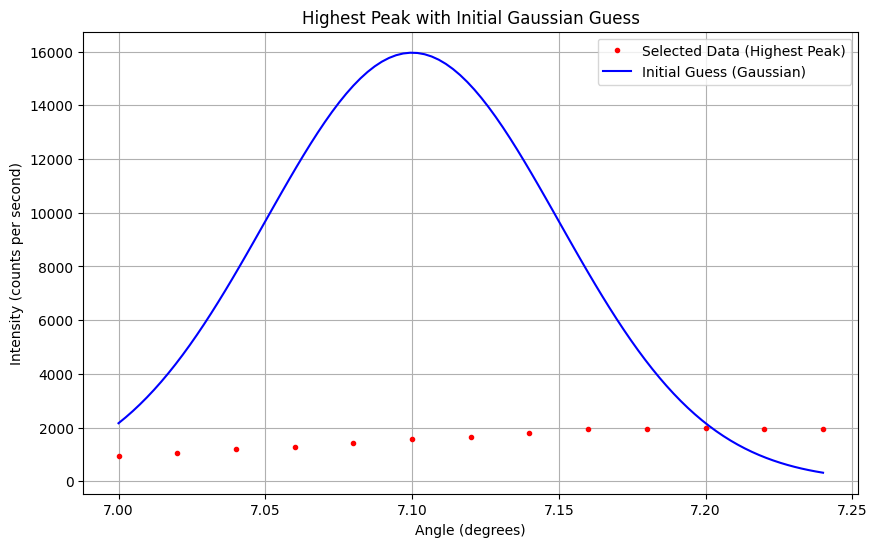

In [22]:
# --- Exercise 2, Part 3 ---

# First, let's focus on the highest peak. From the initial plot,
# this peak is around 7.1 degrees. We need to select data specifically
# around this peak for this step.
# Adjust the range based on your visual estimation of the highest peak
angles_highest_peak = angles_full_data[(angles_full_data >= 7.0) & (angles_full_data <= 7.25)]
counts_highest_peak = counts_full_data[(angles_full_data >= 7.0) & (angles_full_data <= 7.25)]


# Define initial guesses for the Gaussian parameters (intensity, mu, sigma)
# Estimate these values by looking at the highest peak in your plot.
# intensity: roughly the peak height
# mu: the angle where the peak is centered
# sigma: roughly related to the width of the peak (a smaller sigma means a narrower peak)
initial_guess_peak1 = [2000, 7.1, 0.05] # Adjust these values based on your plot

# Generate y values for the initial guess using the Gau function
x_plot_peak1 = np.linspace(min(angles_highest_peak), max(angles_highest_peak), num=100)
y_guess_peak1 = Gau(x_plot_peak1, *initial_guess_peak1)

# Plot the data and the initial guess
plt.figure(figsize=(10, 6))
plt.plot(angles_highest_peak, counts_highest_peak, 'r.', label='Selected Data (Highest Peak)')
plt.plot(x_plot_peak1, y_guess_peak1, 'b-', label='Initial Guess (Gaussian)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity (counts per second)')
plt.title('Highest Peak with Initial Gaussian Guess')
plt.legend()
plt.grid(True)
plt.show()

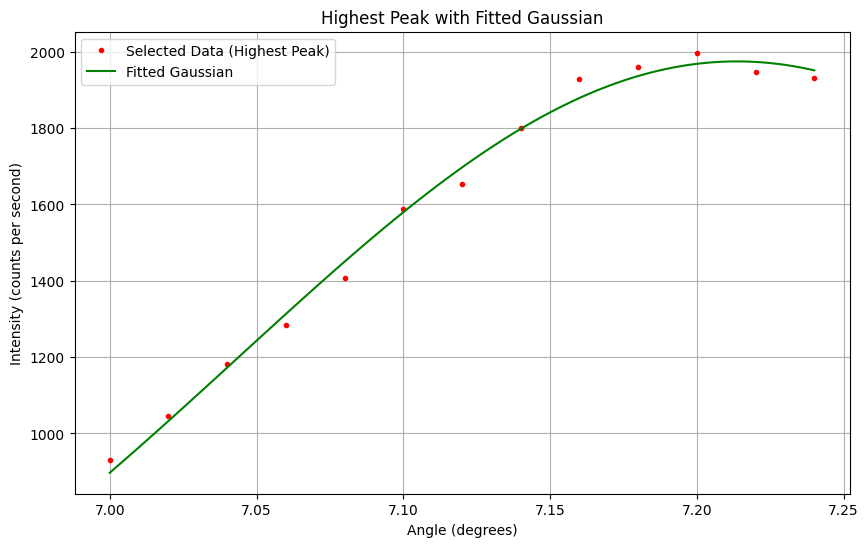

In [24]:

# Generate y values for the fitted Gaussian function
x_plot_fit_peak1 = np.linspace(min(angles_highest_peak), max(angles_highest_peak), num=100)
y_fit_peak1 = Gau(x_plot_fit_peak1, *popt_peak1)

# Plot the selected data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(angles_highest_peak, counts_highest_peak, 'r.', label='Selected Data (Highest Peak)')
plt.plot(x_plot_fit_peak1, y_fit_peak1, 'g-', label='Fitted Gaussian')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity (counts per second)')
plt.title('Highest Peak with Fitted Gaussian')
plt.legend()
plt.grid(True)
plt.show()

Fitted Parameters for the Highest Peak with Constant Background:
  Intensity: 410.77 +/- 62.00
  Mu (center): 7.2033 +/- 0.0038
  Sigma (width): 0.1198 +/- 0.0097
  Background: 618.05 +/- 101.89


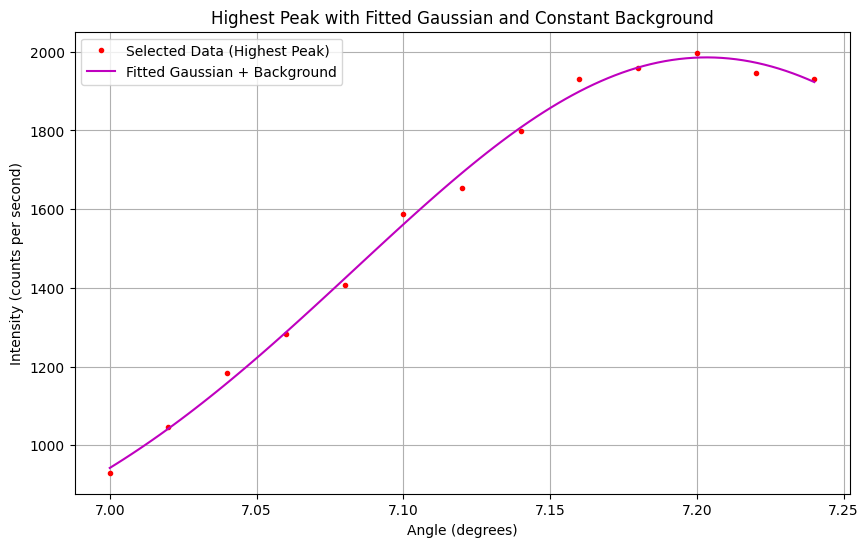

**Step 2: Using `curve_fit` to Perform the Fit**

Now we'll use the `curve_fit` function from `scipy.optimize` to find the best values for the Gaussian parameters (`intensity`, `mu`, and `sigma`) that fit the selected data for the highest peak.

In [23]:
# --- Exercise 2, Part 3 (continued) ---

# Now, use curve_fit to fit the Gaussian function to the selected data
# curve_fit returns two arrays: popt (optimal parameters) and pcov (covariance matrix)
popt_peak1, pcov_peak1 = curve_fit(Gau, angles_highest_peak, counts_highest_peak, p0=initial_guess_peak1)

# Extract the fitted parameters and their errors from popt and pcov
# The diagonal elements of pcov give the variance of the parameters
intensity_fit_peak1 = popt_peak1[0]
dintensity_fit_peak1 = np.sqrt(pcov_peak1[0, 0]) # or np.sqrt(pcov_peak1.diagonal()[0])

mu_fit_peak1 = popt_peak1[1]
dmu_fit_peak1 = np.sqrt(pcov_peak1[1, 1]) # or np.sqrt(pcov_peak1.diagonal()[1])

sigma_fit_peak1 = popt_peak1[2]
dsigma_fit_peak1 = np.sqrt(pcov_peak1[2, 2]) # or np.sqrt(pcov_peak1.diagonal()[2])

# Print the fitted parameters and their errors
print("Fitted Parameters for the Highest Peak:")
print(f"  Intensity: {intensity_fit_peak1:.2f} +/- {dintensity_fit_peak1:.2f}")
print(f"  Mu (center): {mu_fit_peak1:.4f} +/- {dmu_fit_peak1:.4f}")
print(f"  Sigma (width): {sigma_fit_peak1:.4f} +/- {dsigma_fit_peak1:.4f}")

Fitted Parameters for the Highest Peak:
  Intensity: 842.03 +/- 33.78
  Mu (center): 7.2137 +/- 0.0064
  Sigma (width): 0.1701 +/- 0.0063


Fitted Parameters for the Highest Peak with Constant Background:
  Intensity: 410.77 +/- 62.00
  Mu (center): 7.2033 +/- 0.0038
  Sigma (width): 0.1198 +/- 0.0097
  Background: 618.05 +/- 101.89


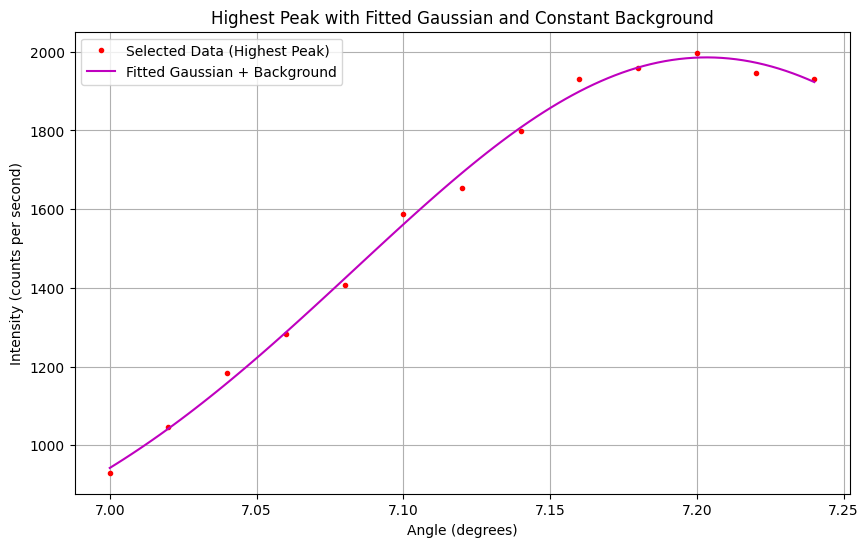

In [26]:
# --- Exercise 2, Part 4 ---
# Repeat the fitting, allowing for a constant background offset.

# Define a new fitting function comprising a constant term plus a Gaussian.
# This function takes the same parameters as the Gaussian (intensity, mu, sigma)
# plus an additional parameter for the constant background (bckg).
def Gau_background(x, intensity, mu, sigma, bckg):
    # Call the original Gaussian function and add the constant background
    return Gau(x, intensity, mu, sigma) + bckg

# Now, use curve_fit to fit the Gau_background function to the selected data.
# We need to provide an initial guess for all four parameters:
# [initial_guess_intensity, initial_guess_mu, initial_guess_sigma, initial_guess_bckg]
# You can use the fitted values from Part 3 for the Gaussian parameters
# and estimate the background from the plot where there are no peaks.
initial_guess_bckg = [intensity_fit_peak1, mu_fit_peak1, sigma_fit_peak1, 500] # Estimate background from plot

# Perform the curve fit using the new function and initial guess
popt_bckg, pcov_bckg = curve_fit(Gau_background, angles_highest_peak, counts_highest_peak, p0=initial_guess_bckg)

# Extract the fitted parameters and their errors
intensity_fit_bckg = popt_bckg[0]
dintensity_fit_bckg = np.sqrt(pcov_bckg[0, 0])

mu_fit_bckg = popt_bckg[1]
dmu_fit_bckg = np.sqrt(pcov_bckg[1, 1])

sigma_fit_bckg = popt_bckg[2]
dsigma_fit_bckg = np.sqrt(pcov_bckg[2, 2])

bckg_fit = popt_bckg[3]
dbckg_fit = np.sqrt(pcov_bckg[3, 3])


# Print the fitted parameters and their errors, including the background
print("Fitted Parameters for the Highest Peak with Constant Background:")
print(f"  Intensity: {intensity_fit_bckg:.2f} +/- {dintensity_fit_bckg:.2f}")
print(f"  Mu (center): {mu_fit_bckg:.4f} +/- {dmu_fit_bckg:.4f}")
print(f"  Sigma (width): {sigma_fit_bckg:.4f} +/- {dsigma_fit_bckg:.4f}")
print(f"  Background: {bckg_fit:.2f} +/- {dbckg_fit:.2f}")


# Generate y values for the fitted function (Gaussian + constant background)
x_plot_fit_bckg = np.linspace(min(angles_highest_peak), max(angles_highest_peak), num=100)
y_fit_bckg = Gau_background(x_plot_fit_bckg, *popt_bckg)

# Plot the selected data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(angles_highest_peak, counts_highest_peak, 'r.', label='Selected Data (Highest Peak)')
plt.plot(x_plot_fit_bckg, y_fit_bckg, 'm-', label='Fitted Gaussian + Background') # Using a different color for the new fit
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity (counts per second)')
plt.title('Highest Peak with Fitted Gaussian and Constant Background')
plt.legend()
plt.grid(True)
plt.show()

Fitted Parameters for the Highest Peak with Linear Background:
  Intensity: 408.38 +/- 935.99
  Mu (center): 7.2031 +/- 0.0735
  Sigma (width): 0.1196 +/- 0.0805
  Linear Background Slope (m): 17.2604 +/- 6802.2312
  Linear Background Intercept (c): 499.33 +/- 46804.50


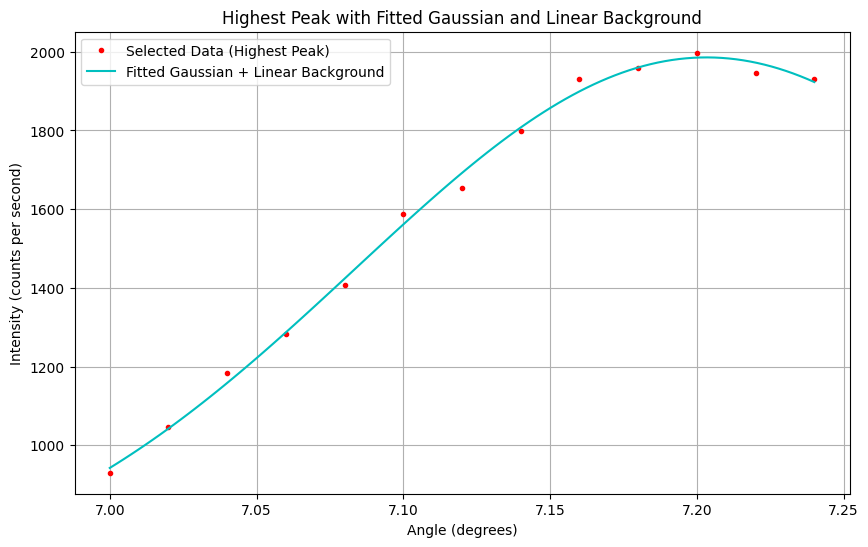

In [27]:
# --- Exercise 2, Part 5 ---
# Repeat the fitting, allowing for a linear background to improve the fit.

# Define a new fitting function comprising a Gaussian plus a linear background.
# The linear background will have a slope (m_bckg) and an intercept (c_bckg).
def Gau_linear_background(x, intensity, mu, sigma, m_bckg, c_bckg):
    # Call the original Gaussian function and add the linear background term (m*x + c)
    return Gau(x, intensity, mu, sigma) + m_bckg * x + c_bckg

# Now, use curve_fit to fit the Gau_linear_background function to the selected data.
# We need to provide an initial guess for all five parameters:
# [initial_guess_intensity, initial_guess_mu, initial_guess_sigma, initial_guess_m_bckg, initial_guess_c_bckg]
# You can use the fitted Gaussian parameters from previous steps.
# Estimate initial guesses for the linear background slope and intercept by looking at the plot.
# The background seems relatively flat, so a small slope and an intercept around the background level are good starting points.
initial_guess_linear_bckg = [intensity_fit_bckg, mu_fit_bckg, sigma_fit_bckg, 0, bckg_fit] # Use previous fit results for Gaussian and constant background as starting points

# Perform the curve fit using the new function and initial guess
# It might be necessary to adjust bounds or initial guesses if the fit doesn't converge well.
popt_linear_bckg, pcov_linear_bckg = curve_fit(Gau_linear_background, angles_highest_peak, counts_highest_peak, p0=initial_guess_linear_bckg)

# Extract the fitted parameters and their errors
intensity_fit_linear_bckg = popt_linear_bckg[0]
dintensity_fit_linear_bckg = np.sqrt(pcov_linear_bckg[0, 0])

mu_fit_linear_bckg = popt_linear_bckg[1]
dmu_fit_linear_bckg = np.sqrt(pcov_linear_bckg[1, 1])

sigma_fit_linear_bckg = popt_linear_bckg[2]
dsigma_fit_linear_bckg = np.sqrt(pcov_linear_bckg[2, 2])

m_bckg_fit = popt_linear_bckg[3]
dm_bckg_fit = np.sqrt(pcov_linear_bckg[3, 3])

c_bckg_fit = popt_linear_bckg[4]
dc_bckg_fit = np.sqrt(pcov_linear_bckg[4, 4])


# Print the fitted parameters and their errors, including the linear background parameters
print("Fitted Parameters for the Highest Peak with Linear Background:")
print(f"  Intensity: {intensity_fit_linear_bckg:.2f} +/- {dintensity_fit_linear_bckg:.2f}")
print(f"  Mu (center): {mu_fit_linear_bckg:.4f} +/- {dmu_fit_linear_bckg:.4f}")
print(f"  Sigma (width): {sigma_fit_linear_bckg:.4f} +/- {dsigma_fit_linear_bckg:.4f}")
print(f"  Linear Background Slope (m): {m_bckg_fit:.4f} +/- {dm_bckg_fit:.4f}")
print(f"  Linear Background Intercept (c): {c_bckg_fit:.2f} +/- {dc_bckg_fit:.2f}")


# Generate y values for the fitted function (Gaussian + linear background)
x_plot_fit_linear_bckg = np.linspace(min(angles_highest_peak), max(angles_highest_peak), num=100)
y_fit_linear_bckg = Gau_linear_background(x_plot_fit_linear_bckg, *popt_linear_bckg)

# Plot the selected data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(angles_highest_peak, counts_highest_peak, 'r.', label='Selected Data (Highest Peak)')
plt.plot(x_plot_fit_linear_bckg, y_fit_linear_bckg, 'c-', label='Fitted Gaussian + Linear Background') # Using a different color
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity (counts per second)')
plt.title('Highest Peak with Fitted Gaussian and Linear Background')
plt.legend()
plt.grid(True)
plt.show()

Fitted Parameters for Two Peaks with Linear Background:
Peak 1:
  Intensity: 246.59 +/- 270.96
  Mu (center): 6.3687 +/- 0.1232
  Sigma (width): 0.1354 +/- 0.0566
Peak 2:
  Intensity: 379.95 +/- 50.57
  Mu (center): 7.2018 +/- 0.0045
  Sigma (width): 0.1210 +/- 0.0060
Linear Background:
  Slope (m): 537.5445 +/- 285.9752
  Intercept (c): -3134.99 +/- 1953.68


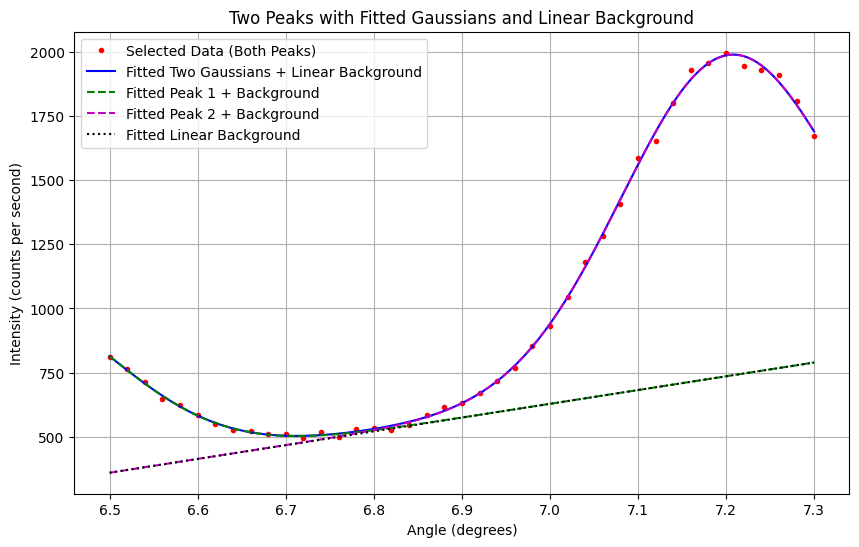

In [28]:
# --- Exercise 2, Part 6 ---
# Repeat, but allowing not only for a linear background to improve the fit,
# but also trying to fit the other peak together with the main one.

# Define a new fitting function comprising two Gaussian functions and a linear background.
# This function will have parameters for each Gaussian (intensity1, mu1, sigma1, intensity2, mu2, sigma2)
# and parameters for the linear background (m_bckg, c_bckg).
def two_gaussians_linear_background(x, intensity1, mu1, sigma1, intensity2, mu2, sigma2, m_bckg, c_bckg):
    # Calculate the contribution from the first Gaussian peak
    peak1 = Gau(x, intensity1, mu1, sigma1)
    # Calculate the contribution from the second Gaussian peak
    peak2 = Gau(x, intensity2, mu2, sigma2)
    # Calculate the contribution from the linear background
    linear_bckg = m_bckg * x + c_bckg
    # Return the sum of the two peaks and the background
    return peak1 + peak2 + linear_bckg

# For this part, we'll use the data selection that includes both peaks (from Exercise 2, Part 1)
# Make sure 'angles_selected' and 'counts_selected' contain the data for both peaks.
# You might need to adjust the range in the cell for Exercise 2, Part 1 if you narrowed it down too much.
# We will use the variables angles_selected and counts_selected from the initial data selection.

# Provide an initial guess for all eight parameters:
# [intensity1, mu1, sigma1, intensity2, mu2, sigma2, m_bckg, c_bckg]
# Estimate these values by looking at the plot of the data containing both peaks.
# Peak 1 (the smaller one) is around 6.5 degrees, and Peak 2 (the larger one) is around 7.1 degrees.
# You can use the fitted values from the linear background fit of the highest peak (Part 5)
# as starting points for the second peak and the background.
# You'll need to estimate initial values for the first peak (intensity1, mu1, sigma1).
initial_guess_two_peaks_linear_bckg = [
    200, 6.5, 0.05,  # Initial guess for the first peak (intensity, mu, sigma) - adjust these based on the plot
    intensity_fit_linear_bckg, mu_fit_linear_bckg, sigma_fit_linear_bckg, # Use results from Part 5 for the second peak
    m_bckg_fit, c_bckg_fit # Use results from Part 5 for the linear background
]

# Perform the curve fit using the new function and the initial guess.
# This fit is more complex and might require adjusting initial guesses or bounds
# if the fit doesn't converge well or gives unreasonable results.
popt_two_peaks, pcov_two_peaks = curve_fit(two_gaussians_linear_background, angles_selected, counts_selected, p0=initial_guess_two_peaks_linear_bckg)

# Extract the fitted parameters and their errors for both peaks and the background
intensity1_fit, mu1_fit, sigma1_fit, intensity2_fit, mu2_fit, sigma2_fit, m_bckg_fit_two, c_bckg_fit_two = popt_two_peaks
dintensity1_fit, dmu1_fit, dsigma1_fit, dintensity2_fit, dmu2_fit, dsigma2_fit, dm_bckg_fit_two, dc_bckg_fit_two = np.sqrt(np.diag(pcov_two_peaks))


# Print the fitted parameters and their errors
print("Fitted Parameters for Two Peaks with Linear Background:")
print("Peak 1:")
print(f"  Intensity: {intensity1_fit:.2f} +/- {dintensity1_fit:.2f}")
print(f"  Mu (center): {mu1_fit:.4f} +/- {dmu1_fit:.4f}")
print(f"  Sigma (width): {sigma1_fit:.4f} +/- {dsigma1_fit:.4f}")
print("Peak 2:")
print(f"  Intensity: {intensity2_fit:.2f} +/- {dintensity2_fit:.2f}")
print(f"  Mu (center): {mu2_fit:.4f} +/- {dmu2_fit:.4f}")
print(f"  Sigma (width): {sigma2_fit:.4f} +/- {dsigma2_fit:.4f}")
print("Linear Background:")
print(f"  Slope (m): {m_bckg_fit_two:.4f} +/- {dm_bckg_fit_two:.4f}")
print(f"  Intercept (c): {c_bckg_fit_two:.2f} +/- {dc_bckg_fit_two:.2f}")


# Generate y values for the fitted function (two Gaussians + linear background)
x_plot_two_peaks = np.linspace(min(angles_selected), max(angles_selected), num=200) # Use more points for a smoother curve
y_fit_two_peaks = two_gaussians_linear_background(x_plot_two_peaks, *popt_two_peaks)

# You can also plot the individual components (optional but helpful for visualization)
y_fit_peak1_only = Gau(x_plot_two_peaks, intensity1_fit, mu1_fit, sigma1_fit)
y_fit_peak2_only = Gau(x_plot_two_peaks, intensity2_fit, mu2_fit, sigma2_fit)
y_fit_linear_bckg_only = m_bckg_fit_two * x_plot_two_peaks + c_bckg_fit_two


# Plot the selected data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(angles_selected, counts_selected, 'r.', label='Selected Data (Both Peaks)')
plt.plot(x_plot_two_peaks, y_fit_two_peaks, 'b-', label='Fitted Two Gaussians + Linear Background')

# Plot individual components
plt.plot(x_plot_two_peaks, y_fit_peak1_only + y_fit_linear_bckg_only, 'g--', label='Fitted Peak 1 + Background')
plt.plot(x_plot_two_peaks, y_fit_peak2_only + y_fit_linear_bckg_only, 'm--', label='Fitted Peak 2 + Background')
plt.plot(x_plot_two_peaks, y_fit_linear_bckg_only, 'k:', label='Fitted Linear Background')


plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity (counts per second)')
plt.title('Two Peaks with Fitted Gaussians and Linear Background')
plt.legend()
plt.grid(True)
plt.show()